In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt
import numpy

In [2]:
# Read the Data using Pandas
data = pd.read_csv('AAPL.csv')

In [3]:
### Delete all the null values in nepse data
data.dropna(inplace=True)

In [4]:
data=data.reset_index()['close']

In [6]:
data.shape

(1258,)

In [7]:
scaler = MinMaxScaler(feature_range=(0,1))
data = scaler.fit_transform(np.array(data).reshape(-1,1))

In [8]:
len(data)

1258

In [9]:
##splitting dataset into train and test split
training_size = int(len(data)*0.7)
test_size=len(data)-training_size
data_train = data[0:training_size,:]
data_test = data[training_size:len(data),:]

In [11]:
data_train.shape

(880, 1)

In [12]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)


In [13]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(data_train, time_step)
X_test, y_test = create_dataset(data_test, time_step)

In [14]:
print(X_train.shape), print(y_train.shape)

(779, 100)
(779,)


(None, None)

In [15]:
print(X_test.shape), print(y_test.shape)

(277, 100)
(277,)


(None, None)

In [16]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [17]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,input_shape = (time_step,1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60,activation = 'relu',  return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80,activation = 'relu',  return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120,activation = 'relu', ))
model.add(Dropout(0.5))

model.add(Dense(units =1))

model.compile(loss='mean_squared_error',optimizer='adam')

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [19]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100

13/13 [==============================] - 6s 191ms/step - loss: 0.0408 - val_loss: 0.0919
Epoch 2/100
13/13 [==============================] - 2s 145ms/step - loss: 0.0112 - val_loss: 0.1147
Epoch 3/100
13/13 [==============================] - 2s 148ms/step - loss: 0.0063 - val_loss: 0.0458
Epoch 4/100
13/13 [==============================] - 2s 146ms/step - loss: 0.0043 - val_loss: 0.0147
Epoch 5/100
13/13 [==============================] - 2s 146ms/step - loss: 0.0037 - val_loss: 0.0105
Epoch 6/100
13/13 [==============================] - 2s 145ms/step - loss: 0.0039 - val_loss: 0.0105
Epoch 7/100
13/13 [==============================] - 2s 145ms/step - loss: 0.0031 - val_loss: 0.0140
Epoch 8/100
13/13 [==============================] - 2s 142ms/step - loss: 0.0029 - val_loss: 0.0145
Epoch 9/100
13/13 [==============================] - 2s 142ms/step - loss: 0.0029 - val_loss: 0.0179
Epoch 10/100
13/13 [==============================] - 2s 143ms/step - loss: 0.0032 - val_l

In [85]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

12/12 [==============================] - 0s 5ms/step


In [86]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)


In [59]:
y_train.reshape(-1,1)

array([[2.50189501e-02],
       [2.08284667e-02],
       [2.21776212e-02],
       [1.86593313e-02],
       [1.85878214e-02],
       [1.28479555e-02],
       [1.34820105e-02],
       [1.31625993e-02],
       [9.77302740e-03],
       [5.85904911e-03],
       [4.35734002e-03],
       [9.20094775e-04],
       [1.12747365e-02],
       [5.55393996e-03],
       [5.95439572e-03],
       [8.29515496e-04],
       [4.36210735e-03],
       [9.43931427e-04],
       [2.35982857e-03],
       [0.00000000e+00],
       [9.82070070e-04],
       [5.32987543e-03],
       [1.29623715e-02],
       [1.34105005e-02],
       [2.01896444e-02],
       [2.98816272e-02],
       [2.36078203e-02],
       [2.61821788e-02],
       [2.90187404e-02],
       [2.54575445e-02],
       [2.22014578e-02],
       [1.90788564e-02],
       [1.63138048e-02],
       [1.81587616e-02],
       [1.91360644e-02],
       [2.00370898e-02],
       [2.09524173e-02],
       [2.02659217e-02],
       [2.35553797e-02],
       [3.01485977e-02],


In [60]:
y_train.shape

(782,)

In [62]:
y_train = scaler.inverse_transform(pd.DataFrame(y_train))

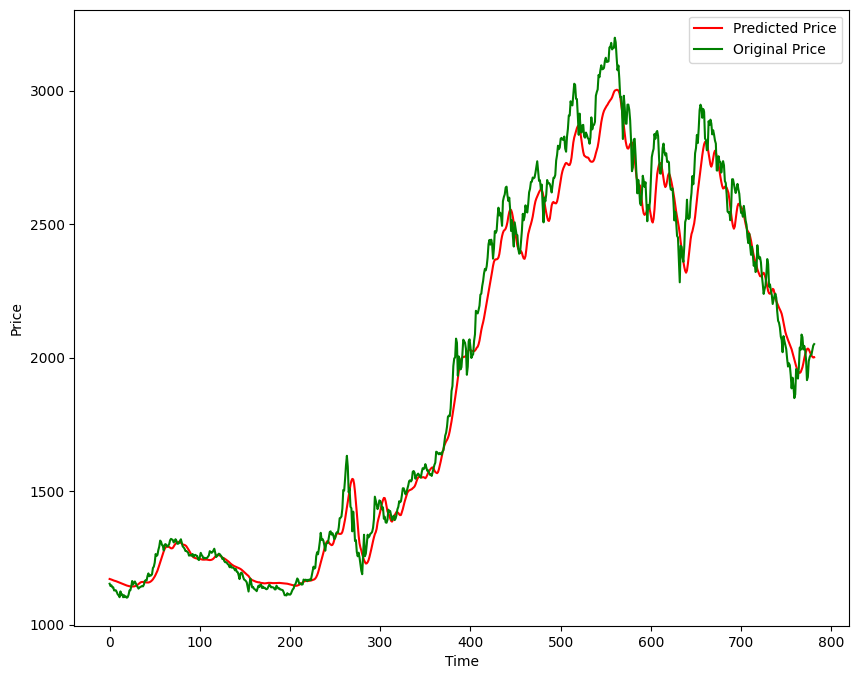

In [63]:
plt.figure(figsize=(10,8))
plt.plot(train_predict, 'r', label = 'Predicted Price')
plt.plot(y_train, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [64]:
model.save('LSTM.keras')